
# Exploratory Data Analysis - Avacado Price Analysis

## Table of Contents

1. [Problem Statement](#section1)<br>
    - 1.1 [Introduction](#section101)<br/>
    - 1.2 [Data source and dataset](#section102)<br/>
2. [Data Loading and Description](#section2)
3. [Data Profiling](#section3)
    - 3.1 [Understanding the Dataset](#section301)<br/>
    - 3.2 [Pre Profiling](#section302)<br/>
    - 3.3 [Initial observations](#section303)<br/>
    - 3.4 [Final observations](#section304)<br/>
4. [Data Normalization](#section4)
    - 4.1 [Standardize all column headers to lower case ](#section401)<br/>
    - 4.2 [Missing Data and its imputation](#section402)<br/>
5. [Conclusions](#section5)

<a id=section1></a>
## 1. Problem Statement

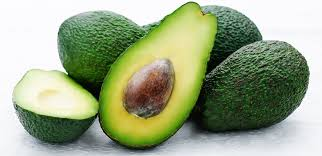

"This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. Here's how the Hass Avocado Board describes the data on their website"

<a id=section101></a>
## 1.1 Introduction

This Exploratory Data Analysis is to practice Python skills learned till now on a structured data set including loading, inspecting, wrangling, exploring, and drawing conclusions from data. The notebook has observations with each step in order to explain thoroughly how to approach the data set. Based on the observation some questions also are answered in the notebook for the reference though not all of them are explored in the analysis.

This dataset represents weekly retail scan data for National retail volume (units) and price. Thus has Historical data on avocado prices and sales volume in multiple US markets.

<a id=section102></a>
## 1.2 Data source and dataset 

a. How was it collected?

This dataset represents weekly retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Source: IRI/FreshLook Marketing Multi-Outlet (MULO) retail scan data.* Multi-Outlet (MULO) reporting reflects retail scan sales across the following channels: grocery, mass, club, drug, dollar and military

<a id=section2></a>
## 2. Data Loading and Description


The dataset comprises of __18249 observations of 14 columns__. Below is a table showing names of all the columns and their description.

| Column Name   | Description                                                   |
| ------------- |:-------------------------------------------------------------:| 
| Date          | The date of the observation                                   |   
| AveragePrice  | The average price of a single avocado                         |  
| type          | Conventional or organic                                       | 
| year          | The year                                                          |   
| Region        | The city or region of the observation                         |
| Total Volume  | Total number of avocados sold                                 |
| 4046          | Total number of avocados with PLU 4046 sold                   |
| 4225          | Total number of avocados with PLU 4225 sold                   |
| 4770          | Total number of avocados with PLU 4770 sold                   |

#### Import Packages

In [6]:
import numpy as np                                  # Implemennts milti-dimensional array and matrices
import pandas as pd                                 # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns           # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

import warnings                                                                 # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore') 

pd.set_option('display.max_columns', 100)  

from subprocess import check_output

import pylab as pl
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

#### Importing datasets

In [7]:
AvacadoSales_data = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/avocado.csv")     # Importing training dataset using pd.read_csv

<a id=section3></a>
## 3. Data Profiling

- In the upcoming sections we will first __understand our dataset__ using various pandas functionalities.
- Then with the help of __pandas profiling__ we will find which columns of our dataset need preprocessing.
- In __preprocessing__ we will deal with erronous and missing values of columns. 
- Again we will do __pandas profiling__ to see how preprocessing have transformed our dataset.

<a id=section301></a>
### 3.1 Understanding the Dataset

To gain insights from data we must look into each aspect of it very carefully. We will start with observing few rows and columns of data both from the starting and from the end

In [8]:
AvacadoSales_data.columns                                                  # This will print the names of all columns.

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [9]:
AvacadoSales_data.shape                                         # This will print the number of rows and comlumns of the Data Frame

(18249, 14)

AvacadoSales_data has __18249 rows__ and __14 columns.__

In [34]:
AvacadoSales_data.dtypes 

date            datetime64[ns]
averageprice           float64
total volume           float64
4046                   float64
4225                   float64
4770                   float64
total bags             float64
small bags             float64
large bags             float64
xlarge bags            float64
type                    object
year                     int64
region                    int8
conventional             uint8
organic                  uint8
Date_Q                   int64
dtype: object

In [11]:
AvacadoSales_data.head()                                                   # This will print the First n rows of the Data Frame

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [12]:
AvacadoSales_data.tail()                                                   # This will print the last n rows of the Data Frame

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [15]:
AvacadoSales_data.info()                                        # This will give Index, Datatype and Memory information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
Unnamed: 0      18249 non-null int64
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [16]:
AvacadoSales_data.describe(include='all')                                                   

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,18249.000000,18249,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249,18249.000000,18249
unique,NaN,169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,54
top,NaN,2015-12-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,conventional,NaN,Atlanta
freq,NaN,108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9126,NaN,338
mean,24.232232,NaN,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,NaN,2016.147899,NaN
std,15.481045,NaN,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,NaN,0.939938,NaN
min,0.000000,NaN,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,NaN,2015.000000,NaN
25%,10.000000,NaN,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,NaN,2015.000000,NaN
50%,24.000000,NaN,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,NaN,2016.000000,NaN
75%,38.000000,NaN,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,NaN,2017.000000,NaN


In [17]:
AvacadoSales_data.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

From the above output we can see that no columns have null values.

In [18]:
total = AvacadoSales_data.isnull().sum().sort_values(ascending=False)
percent = (AvacadoSales_data.isnull().sum()/AvacadoSales_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data)

              Total  Percent
region            0      0.0
year              0      0.0
type              0      0.0
XLarge Bags       0      0.0
Large Bags        0      0.0
Small Bags        0      0.0
Total Bags        0      0.0
4770              0      0.0
4225              0      0.0
4046              0      0.0
Total Volume      0      0.0
AveragePrice      0      0.0
Date              0      0.0
Unnamed: 0        0      0.0


From the above output we can conclude that there are no missing values.

<a id=section302></a>
### 3.2 Pre Profiling

- By pandas profiling, an __interactive HTML report__ gets generated which contins all the information about the columns of the dataset, like the __counts and type__ of each _column_. Detailed information about each column, __coorelation between different columns__ and a sample of dataset.<br/>
- It gives us __visual interpretation__ of each column in the data.
- _Spread of the data_ can be better understood by the distribution plot. 
- _Grannular level_ analysis of each column.

In [20]:
profile = pandas_profiling.ProfileReport(AvacadoSales_data)
profile.to_file(outputfile="AvacadoSales_data_before_preprocessing.html")

Here, we have done Pandas Profiling before preprocessing our dataset, so we have named the html file as __AvacadoSales_data_before_preprocessing.html__. Take a look at the file and see what useful insight you can develop from it. <br/>
Now we will process our data to better understand it.

<a id=section303></a>
### 3.3. Initial observations:
- Summary of data types in this dataset:
 - <em>Object</em>: <strong>Date</strong> ,<strong>type</strong>, <strong>region</strong>
 - <em>Numeric</em>: Everything else

<a id=section304></a>
### 3.4. Final observations

Variables to transform prior to analysis:
- Standardize all column headers to lower case (to prevent typos!)
- Convert Date column to pandas readable Datetime type.
- Remove the column 'Unnamed: 0', as it ia just an index column.
- do Non-numerical data conversions for easy data analysis and model building for prediction.

<a id=section4></a> 
## 4. Data Normalization

In [21]:
AvacadoSales_data['Date'] = pd.to_datetime(AvacadoSales_data['Date'])

In [22]:
AvacadoSales_data.columns                                                  # This will print the names of all columns.

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [23]:
AvacadoSales_data = AvacadoSales_data.drop('Unnamed: 0',1)

In [24]:
AvacadoSales_data.columns = map(str.lower, AvacadoSales_data.columns)           # map() function returns a list of results after applying the given function
                                                                         # to each item of a given iterable.
AvacadoSales_data.dtypes                                                                # Confirm that all variable names are now lower case

date            datetime64[ns]
averageprice           float64
total volume           float64
4046                   float64
4225                   float64
4770                   float64
total bags             float64
small bags             float64
large bags             float64
xlarge bags            float64
type                    object
year                     int64
region                  object
dtype: object

<a id=section401></a> 
### 4.1. Data Conversions

In [25]:
# convert type into dummies by separating it into 2 other columns: organic and conventional
dummy_type = pd.get_dummies(AvacadoSales_data['type'])
# print sample
dummy_type.sample(2)
# concat
AvacadoSales_data = pd.concat([AvacadoSales_data, dummy_type], axis=1)
print(AvacadoSales_data.sample(2))

            date  averageprice  total volume     4046     4225  4770  \
16946 2017-05-21          2.05      15451.08   853.03  9892.77  1.65   
16650 2017-12-24          1.44      36918.84  3151.04  5172.61  1.67   

       total bags  small bags  large bags  xlarge bags     type  year  \
16946     4703.63     4700.00        3.63         0.00  organic  2017   
16650    28593.52     2146.48    26439.61         7.43  organic  2017   

         region  conventional  organic  
16946  SanDiego             0        1  
16650  Portland             0        1  


In [26]:
AvacadoSales_data['region'] = AvacadoSales_data['region'].astype('category')
AvacadoSales_data.dtypes

AvacadoSales_data['region'] = AvacadoSales_data['region'].cat.codes
AvacadoSales_data['region'].sample(3)


12728    15
6597     18
2603     50
Name: region, dtype: int8

In [27]:
AvacadoSales_data['Date_Q'] = AvacadoSales_data['date'].apply(lambda x:x.quarter)
AvacadoSales_data['Date_Q'].count()
AvacadoSales_data.dtypes

date            datetime64[ns]
averageprice           float64
total volume           float64
4046                   float64
4225                   float64
4770                   float64
total bags             float64
small bags             float64
large bags             float64
xlarge bags            float64
type                    object
year                     int64
region                    int8
conventional             uint8
organic                  uint8
Date_Q                   int64
dtype: object

Post Profiling

In [33]:
profile = pandas_profiling.ProfileReport(AvacadoSales_data)
profile.to_file(outputfile="AvacadoSales_data_postprocessing.html")

Now we have preprocessed the data, now the dataset doesnot contain missing values, we have also introduced new feature named Mileage_Level. So, the pandas profiling report which we have generated after preprocessing will give us more beneficial insights. You can compare the two reports, i.e carsales_data_before_preprocessing.html and carsales_data_postprocessing.html.

<a id=section402></a> 
### 4.2. Plots and data analysis

Distribution for Average Price for all Avocado types

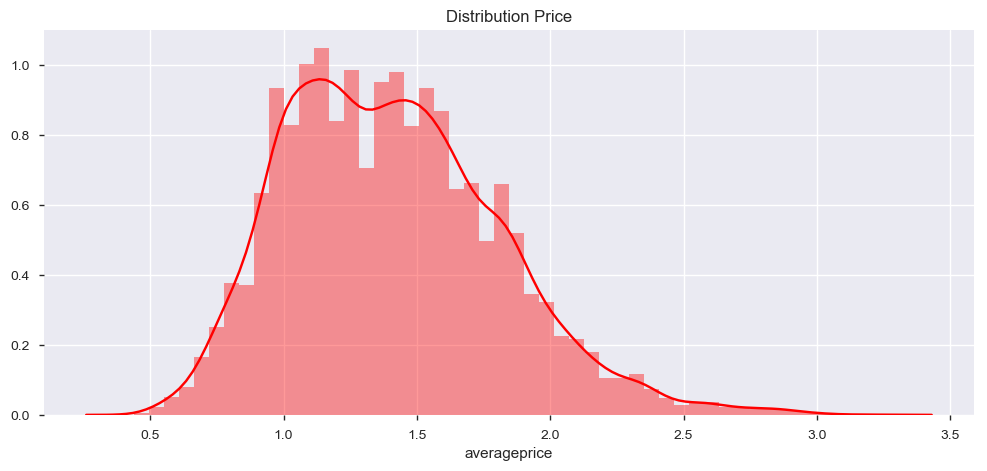

In [28]:
pl.figure(figsize=(12,5))
pl.title("Distribution Price")
ax = sns.distplot(AvacadoSales_data["averageprice"], color = 'r')

Observation: AveragePrice of avocado is normal with the values mostly between 1.0 and 2.0.

Text(0,0.5,'Frequency Count')

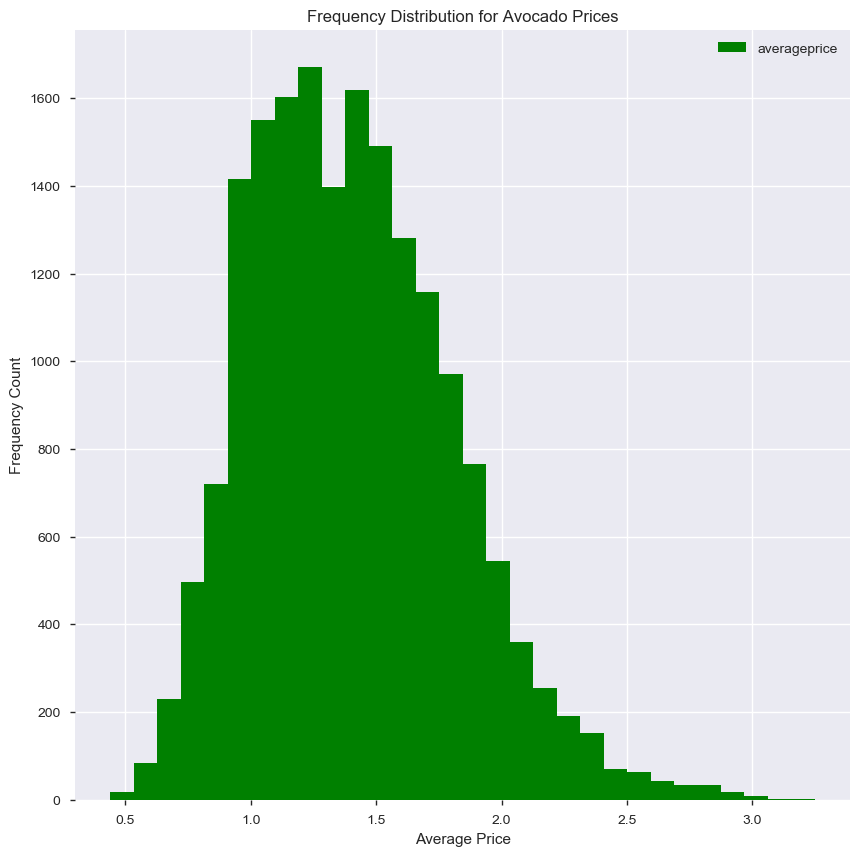

In [31]:
AvacadoSales_data['averageprice'].plot(kind='hist', bins=30, color='green', figsize=(10,10), grid=True, title='Frequency Distribution for Avocado Prices')
plt.legend()
plt.xlabel('Average Price')
plt.ylabel('Frequency Count')

Observation: The price distribution for both types of Avacoda is relatively normal.
The avocado price hovers between $1.00 and $1.80.

Text(0,0.5,'Frequency Count')

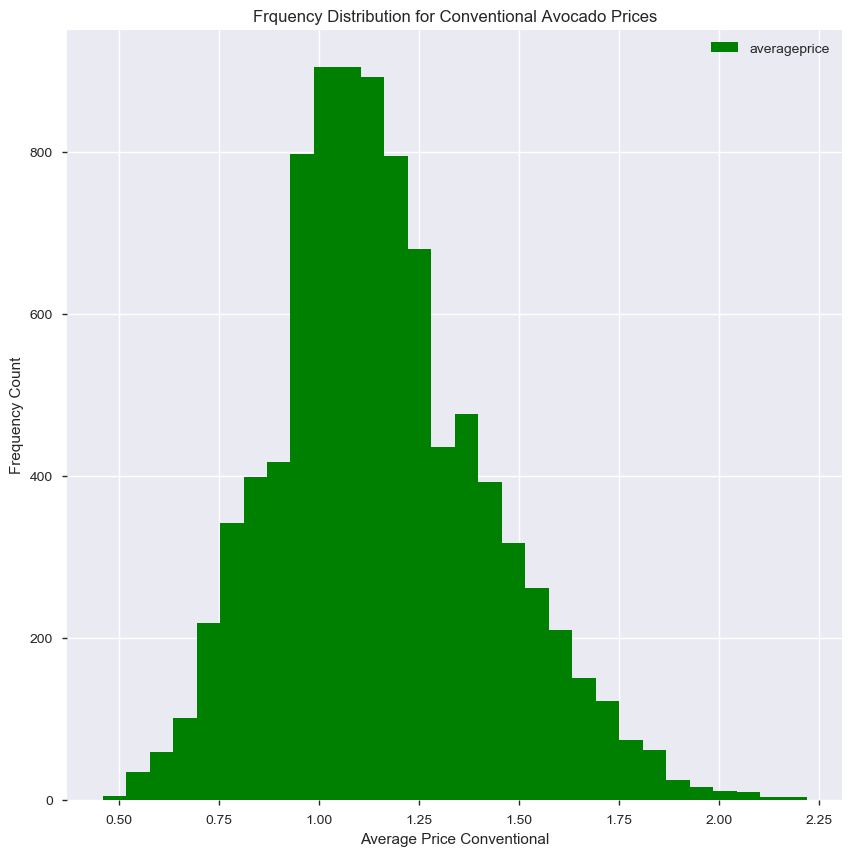

In [30]:
#Conventional type Average price distribution 

Conventional = AvacadoSales_data[AvacadoSales_data['type'] == 'conventional']

Conventional['averageprice'].plot(kind='hist', bins=30, color='green',figsize=(10,10), grid=True, title='Frquency Distribution for Conventional Avocado Prices')
plt.legend()
plt.xlabel('Average Price Conventional')
plt.ylabel('Frequency Count')

Observation: For conventional avocado's we see the price distribution is relatively normal. The conventional avocado price hovers around $1.00.

Text(0,0.5,'Frequency Count')

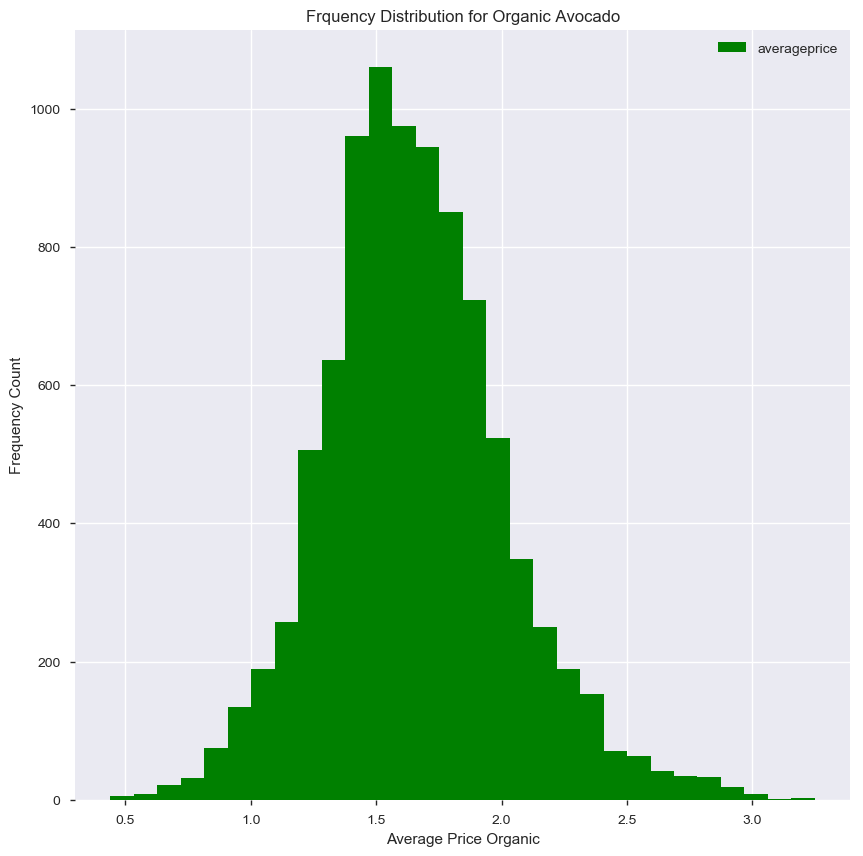

In [64]:
Organic = AvacadoSales_data[AvacadoSales_data['type']== 'organic']

Organic['averageprice'].plot(kind='hist', bins=30, color='green',figsize=(10,10), grid=True, title='Frquency Distribution for Organic Avocado')
plt.legend()
plt.xlabel('Average Price Organic')
plt.ylabel('Frequency Count')

Observation: For Organic avocado's we see the price distribution is relatively normal. The Organic avocado price hovers around $1.50.

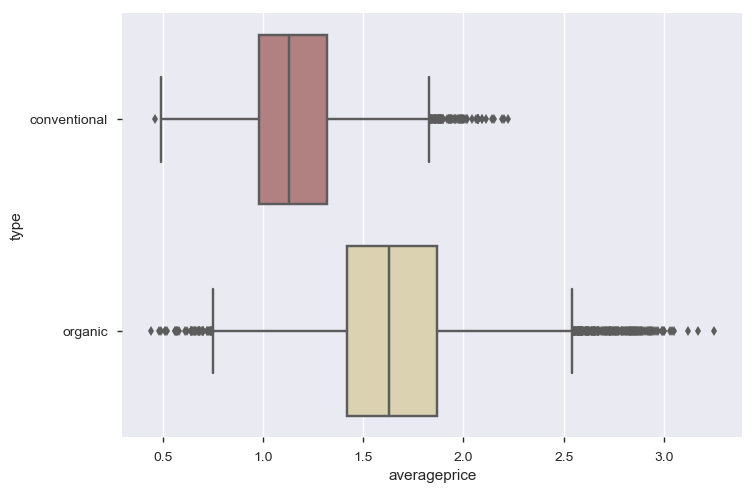

In [66]:
sns.boxplot(y="type", x="averageprice", data=AvacadoSales_data, palette = 'pink')

Observation: Organic avocados are a little more expensive than conventional types of avocados.

In [67]:
Diffprice= Organic['averageprice'].mean() - Conventional['averageprice'].mean()

Diffprice

0.4959590177573876

Observation: On average the price difference between Organic and Conventional Avacados is roughly .50 cents.

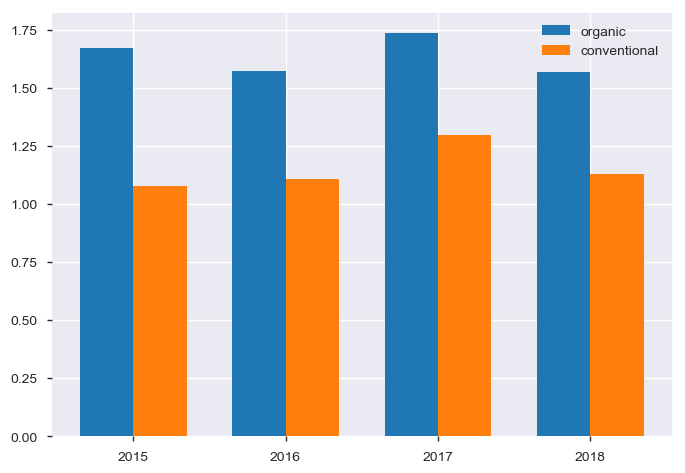

In [65]:
datayearorganic = []
datayearconventional = []
for i in AvacadoSales_data.year.unique():
    datayearorganic.append(AvacadoSales_data[(AvacadoSales_data.year == i) & (AvacadoSales_data['type'] == 'organic')].averageprice.mean())
    datayearconventional.append(AvacadoSales_data[(AvacadoSales_data.year == i) & (AvacadoSales_data.type == 'conventional')].averageprice.mean())
bar_width = 0.35
plt.bar(np.arange(AvacadoSales_data.year.nunique()),datayearorganic,bar_width, label = 'organic')
plt.bar(np.arange(AvacadoSales_data.year.nunique())+bar_width,datayearconventional,bar_width, label = 'conventional')
plt.xticks(np.arange(AvacadoSales_data.year.nunique())+bar_width/2,AvacadoSales_data.year.unique())
plt.legend()
plt.show()

Observation: Average price of organic avocados has been always greater than the conventional ones. Year 2017 records the highest price for both types of the avacados.

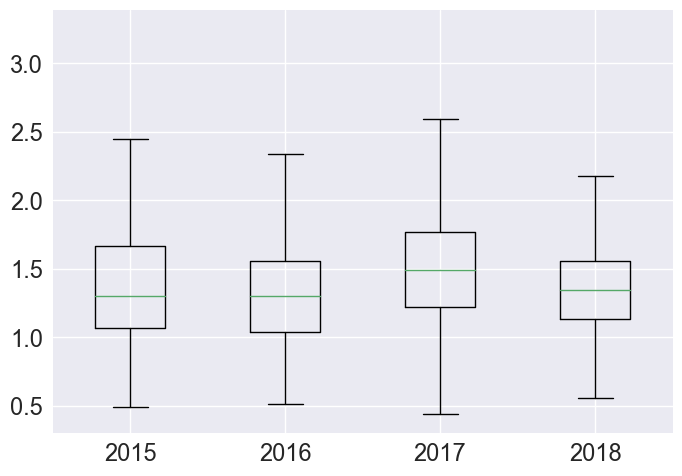

In [140]:
datayear = []
for i in AvacadoSales_data.year.unique():
    datayear.append(AvacadoSales_data[AvacadoSales_data.year == i].averageprice)
plt.boxplot(datayear)
plt.xticks(range(1,AvacadoSales_data.year.nunique()+1),AvacadoSales_data.year.unique())
plt.show()

Observation: Avocados prices have suffered a price spikes in 2017, but the prices have dropped comparitevily in 2018.

In [69]:
AvacadoSales_data.columns

Index(['date', 'averageprice', 'total volume', '4046', '4225', '4770',
       'total bags', 'small bags', 'large bags', 'xlarge bags', 'type', 'year',
       'region', 'conventional', 'organic', 'Date_Q'],
      dtype='object')

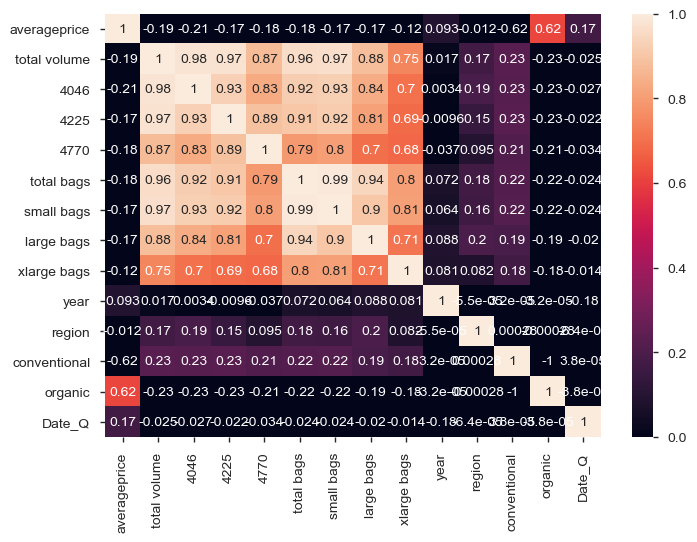

In [70]:
sns.heatmap(AvacadoSales_data.corr(),vmax = 1, vmin = 0,annot = True)
plt.show()

In [36]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
dicts = {}

label.fit(AvacadoSales_data.type.drop_duplicates()) 
dicts['type'] = list(label.classes_)
AvacadoSales_data.type = label.transform(AvacadoSales_data.type) 

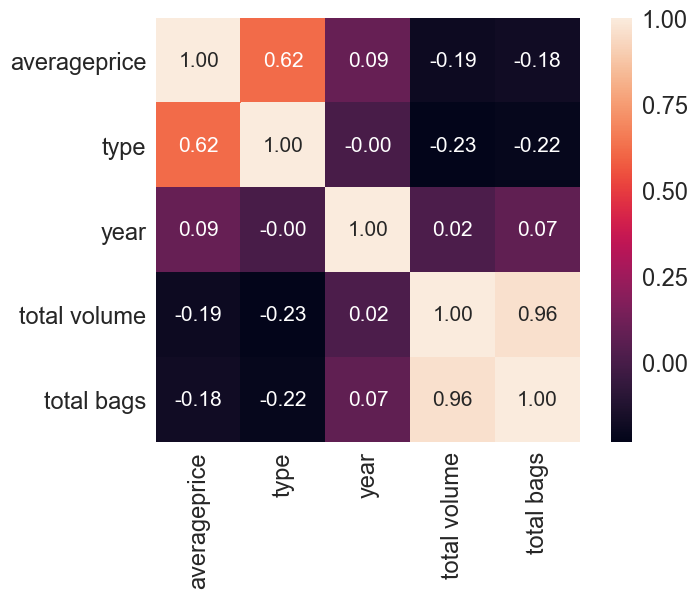

In [37]:
cols = ['averageprice','type','year','total volume','total bags']
cm = np.corrcoef(AvacadoSales_data[cols].values.T)
sns.set(font_scale = 1.7)
hm = sns.heatmap(cm,cbar = True, annot = True,square = True, fmt = '.2f', annot_kws = {'size':15}, yticklabels = cols, xticklabels = cols)

Observation:The price of avocado is influenced by the column 'type'. Also, there is a strong correlation between the features: "Total Bags" and "Total Volume". features Small Bags,Large Bag are also strongly correlated. As boxes goes lighter, correlation gets stronger. As the Total Volume gets a higher value, the number of Small Bags increases faster than Large Bags and XLarge Bags

<a id=section5></a>
## 5. Model Creation and Evaluation

<a id=section501></a> 
#### 5.1 Regression Model with all features (Baseline)

In [38]:
X_columns = ['total volume', '4046', '4225', '4770', 'total bags', 'small bags', 'large bags', 'xlarge bags', 'conventional', 'organic', 
             'Date_Q', 'year', 'region']
X = AvacadoSales_data[X_columns]
y=AvacadoSales_data['averageprice']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.23252019140625357
MSE: 0.09060791128181109
RMSE: 0.30101148031563696


<a id=section502></a> 
#### 5.2 Regression Model w/ top 4 important features in baseline model

In [39]:
X_columns = ['conventional', 'organic', 'Date_Q', 'year']
X = AvacadoSales_data[X_columns]
y=AvacadoSales_data['averageprice']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.23713058607891768
MSE: 0.09344406705311693
RMSE: 0.30568622319809724


<a id=section503></a> 
#### 5.3 Decision Tree Model

In [40]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
pred=dtr.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.22030215504594303
MSE: 0.08270529518903273
RMSE: 0.28758528333180183


<a id=section504></a> 
#### 5.4 Random Forest Model

In [41]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(X_train,y_train)
pred=rdr.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.22038662152182664
MSE: 0.0827833196690666
RMSE: 0.2877209058602913


<a id=section505></a> 
#### 5.5 Regression Model with XGBoost 

In [157]:
import xgboost

X_columns = ['total volume', '4046', '4225', '4770', 'total bags', 'small bags', 'large bags', 'xlarge bags', 'conventional', 'organic', 
             'Date_Q', 'year', 'region']
X = AvacadoSales_data[X_columns]
Y = AvacadoSales_data['averageprice']

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=2018)

# XGBoost Regressor
xgb = xgboost.XGBRegressor(n_estimators=500, learning_rate=0.1, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=8)
# fit data
xgb.fit(X_train,y_train)
# prediction
predictions = xgb.predict(X_test)

# Calculate R-squared
residuals = y_test - predictions
RMSE = np.sqrt(np.mean(residuals**2))
y_test_mean = np.mean(y_test)
tss =  np.sum((y_test - y_test_mean)**2 ) # total sum of square
rss =  np.sum(residuals**2) # sum of residuals
rsq  =  1 - (rss/tss)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', RMSE)
print('R^2 of XGBoost', rsq)

MAE: 0.09359595147929634
MSE: 0.01771736615336724
RMSE: 0.13310659695660162
R^2 of XGBoost 0.8909105096208638


Observation: The RMSE value from the XGBoost regression model is 0.133, obviously lowest compared to the previous models.  Also, the model also has the higher R square value. Hence, we chose the XGBoost regression model as our solution.

<a id=section6></a>
## 6. Conclusion

- The AveragePrice of both organic and conventional avocados was getting more expensive from 2015 to 2018. Also the price varises from region to region.
- Organic avocados are more expensive than conventional ones.
- The AveragePrice of avocados is affected by years, regions, types.
- On evaluating different models to predict the avacado prices, found that the xgboost regression model gave the best results with least RMSE(0.13) value.